<center><h1><strong>Lasso Regression(L1 Regularization)</strong></h1></center>

Lasso regression is regularized version of linear regression that uses L1 penalty.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt
%matplotlib inline

Load the data

In [2]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Load target

In [5]:
df['target'] = data.target

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
df.shape

(442, 11)

Fetch X and Y variable

In [10]:
x = df.drop('target',axis=1)
y = df['target']

Train test Split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

Standardized the training and testing data

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Create model

In [13]:
regression = Lasso(alpha=0.1)

model = regression.fit(x_train,y_train)
y_pred = model.predict(x_test)

Check r2 score

In [14]:
score = r2_score(y_test,y_pred)
print(score)

0.455541399027904


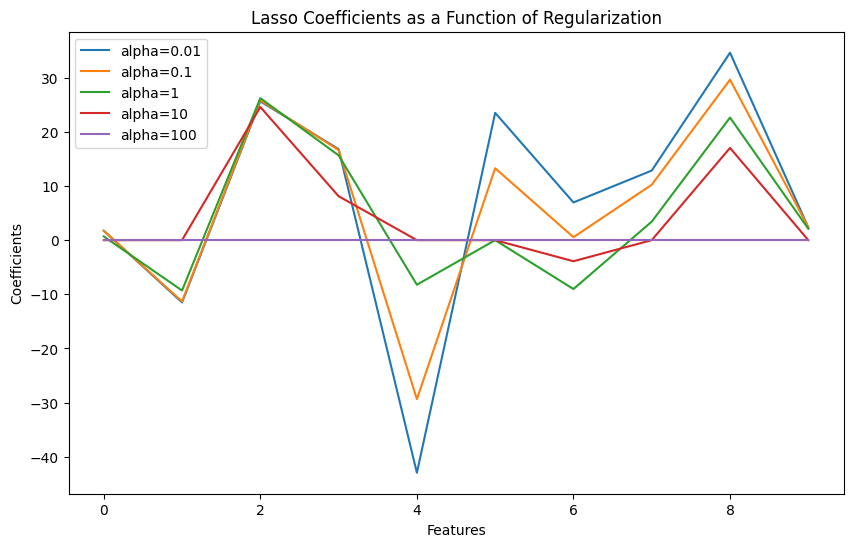

In [16]:
alphas = [0.01, 0.1, 1, 10, 100]
coef = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(x_train,y_train)
    coef.append(lasso.coef_)

plt.figure(figsize=(10,6))
for i in range(len(coef)):
    plt.plot(coef[i],label=f'alpha={alphas[i]}')

plt.legend()
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Lasso Coefficients as a Function of Regularization")
plt.show()